In [1]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv')

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [2]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 13)


In [3]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


In [4]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)
ri.index

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


RangeIndex(start=0, stop=91741, step=1)

In [5]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)
print(ri.shape)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=91741, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')
(91741, 13)


In [6]:
ri.drop(['stop_date', 'stop_time'], axis=1)

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [7]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']
#print(male.columns)
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [8]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [9]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.963953
True     0.036047
Name: search_conducted, dtype: float64
0.03604713268876511


In [10]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [11]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


In [12]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.09025408486936048
stop_datetime
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64


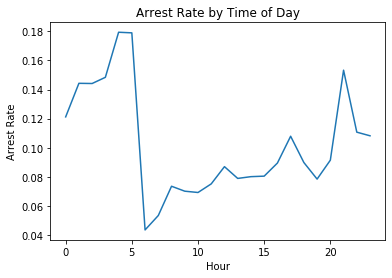

In [13]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

stop_datetime
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


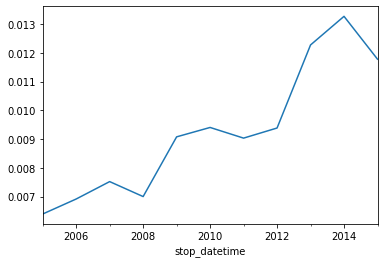

In [14]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

In [15]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1': 'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1': 'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

In [16]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


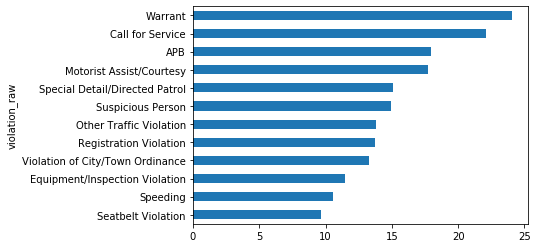

In [17]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()